In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#wyświetl wszystkie wiersze i kolumny
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# dane do modelu

In [3]:
df = pd.read_csv('pm25.csv',index_col = 0, header = 0)
#df = df.drop('pm25lag', axis = 1) #usunięcie zmiennej pm25 opóźnionej
df.head()

,Rok,Miesiąc,Dzień,Godzina,Wysokość_podstawy_niższej_[m],Wysokość_podstawy_wyższej_[m],Widzialność_operatora_[m],Widzialność_automat_[m],Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Poryw_wiatru_[m/s],Temperatura_powietrza_[°C],Temperatura_termometru_zwilżonego_[°C],Ciśnienie_pary_wodnej_[hPa],Wilgotność_względna_[%],Temperatura_punktu_rosy_[°C],Ciśnienie_na_pozimie_stacji_[hPa],Ciśnienie_na_pozimie_morza_[hPa],Wartość_tendencji_[wartość],Opad_za_6_godzin_[mm],Status_pomiaru_WO6G,Status_pomiaru_ROPT,Zachmurzenie_niskie_[oktanty],Niedosyt_wilgotności_[hPa},Usłonecznienie,Poryw_maksymalny_za_okres_WW_[m/s],Temperatura_gruntu_-5_[°C],Temperatura_gruntu_-10_[°C],Temperatura_gruntu_-20_[°C],Temperatura_gruntu_-50_[°C],Temperatura_gruntu_-100_[°C],Status_pomiaru_TG100,Temperatura_minimalna_za_12_godzin_[°C],Status_pomiaru_TMIN,Temperatura_maksymalna_za_12_godzin_[°C],Status_pomiaru_TMAX,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C],Status_pomiaru_TGMI,Równoważnik_wodny_śniegu_[mm/cm],Status_pomiaru_RWSN,Wysokość_pokrywy_śnieżnej_[cm],Status_pomiaru_PKSN,Wysokość_świeżo_spadłego_śniegu_[cm],Wysokość_śniegu_na_poletku_[cm],Wysokość_próbki_[cm],Ciężar_próbki_[g],Niepodległości
2014-01-01 01:00:00,2014.0,1.0,1.0,1.0,210.0,0.0,7000.0,0.0,8.0,119.0,4.0,0.0,1.0,0.0,6.1,93.0,0.0,1009.5,1023.0,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,100.325798
2014-01-01 02:00:00,2014.0,1.0,1.0,2.0,210.0,0.0,7000.0,0.0,8.0,128.0,4.0,0.0,1.2,0.0,6.1,92.0,0.0,1009.0,1022.5,-1.0,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,69.412430
2014-01-01 03:00:00,2014.0,1.0,1.0,3.0,210.0,0.0,7000.0,0.0,8.0,134.0,3.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.6,1022.1,-1.2,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,40.967861
2014-01-01 04:00:00,2014.0,1.0,1.0,4.0,210.0,0.0,7000.0,0.0,8.0,129.0,4.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.2,1021.7,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,37.308937
2014-01-01 05:00:00,2014.0,1.0,1.0,5.0,210.0,0.0,7000.0,0.0,8.0,137.0,4.0,0.0,1.3,0.0,6.1,91.0,0.0,1008.2,1021.7,-0.8,0.0,8.0,8.0,7.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,38.185955


In [4]:
df.columns

Index(['Rok', 'Miesiąc', 'Dzień', 'Godzina', 'Wysokość_podstawy_niższej_[m]',
       'Wysokość_podstawy_wyższej_[m]', 'Widzialność_operatora_[m]',
       'Widzialność_automat_[m]', 'Zachmurzenie_ogólne_[oktanty]',
       'Kierunek_wiatru_[°]', 'Prędkość_wiatru_[m/s]', 'Poryw_wiatru_[m/s]',
       'Temperatura_powietrza_[°C]', 'Temperatura_termometru_zwilżonego_[°C]',
       'Ciśnienie_pary_wodnej_[hPa]', 'Wilgotność_względna_[%]',
       'Temperatura_punktu_rosy_[°C]', 'Ciśnienie_na_pozimie_stacji_[hPa]',
       'Ciśnienie_na_pozimie_morza_[hPa]', 'Wartość_tendencji_[wartość]',
       'Opad_za_6_godzin_[mm]', 'Status_pomiaru_WO6G', 'Status_pomiaru_ROPT',
       'Zachmurzenie_niskie_[oktanty]', 'Niedosyt_wilgotności_[hPa}',
       'Usłonecznienie', 'Poryw_maksymalny_za_okres_WW_[m/s]',
       'Temperatura_gruntu_-5_[°C]', 'Temperatura_gruntu_-10_[°C]',
       'Temperatura_gruntu_-20_[°C]', 'Temperatura_gruntu_-50_[°C]',
       'Temperatura_gruntu_-100_[°C]', 'Status_pomiaru_TG100',
    

In [5]:
feats = ['Rok', 'Miesiąc', 'Dzień', 'Godzina',
         'Zachmurzenie_ogólne_[oktanty]',
         'Kierunek_wiatru_[°]',
         'Prędkość_wiatru_[m/s]',
         'Temperatura_powietrza_[°C]',
         'Wilgotność_względna_[%]',
         'Ciśnienie_na_pozimie_stacji_[hPa]',
         'Ciśnienie_na_pozimie_morza_[hPa]',
         'dzien_tygodnia']

In [6]:
y = df['Niepodległości']
X = df[feats].values

KeyError: "['dzien_tygodnia'] not in index"

# modele

In [6]:
from math import sqrt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [7]:
#podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [8]:
#Zdefiniowanie funkcji do oceny modelu 2
n_folds = 5

def scoring_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    r2= cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    return(rmse, r2)

In [9]:
#XGBoost Regression
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [10]:
#LightGBM

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [11]:
#XGBoost Regression 

score = scoring_cv(model_xgb)
print("Xgboost rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Xgboost rmse: 10.0598 (0.3526), r2: 66.3%



In [12]:
#LightGBM 

score = scoring_cv(model_lgb)
print("LGBM rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

LGBM rmse: 11.1503 (0.3175), r2: 58.6%



In [13]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [14]:
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

# dane z API pogoda

In [15]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime

In [16]:
data = json.loads(requests.get('https://api.openweathermap.org/data/2.5/forecast?id=7531926&APPID=d42ae0550e6312f9e3b422c84a7da8cb').text)
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1581109200,
   'main': {'temp': 271.21,
    'feels_like': 267.85,
    'temp_min': 271.21,
    'temp_max': 271.67,
    'pressure': 1031,
    'sea_level': 1031,
    'grnd_level': 1016,
    'humidity': 52,
    'temp_kf': -0.46},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 0.39, 'deg': 200},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-02-07 21:00:00'},
  {'dt': 1581120000,
   'main': {'temp': 271.35,
    'feels_like': 266.67,
    'temp_min': 271.35,
    'temp_max': 271.7,
    'pressure': 1031,
    'sea_level': 1031,
    'grnd_level': 1016,
    'humidity': 51,
    'temp_kf': -0.35},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 2.26, 'deg': 235},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-02-08 00:00:00'},
  {'dt': 1581130800,


In [17]:
future = pd.DataFrame(columns = list(['rok','mies','dzien','godz',
                                      'zach','kier','prwtr', 'temp','wilg',
                                      'cisg','cism','dztyg']))
print(future)

for i in range(39):

    czas = data['list'][i]['dt_txt']
    czas_obj = datetime.strptime(czas, '%Y-%m-%d %H:%M:%S')
    
    future = future.append({
                    "rok": czas_obj.year,
                    "mies": czas_obj.month,
                    "dzien": czas_obj.day,
                    "godz": czas_obj.hour,
                    "zach": data['list'][i]['clouds']['all']/12.5,
                    "kier": data['list'][i]['wind']['deg'],
                    "prwtr": data['list'][i]['wind']['speed'],
                    "temp": data['list'][i]['main']['temp']-273,
                    "wilg": data['list'][i]['main']['humidity'],
                    "cisg": data['list'][i]['main']['grnd_level'],
                    "cism": data['list'][i]['main']['sea_level'],
                    "dztyg": czas_obj.isocalendar()[2]}, ignore_index = True)

future.head()

Empty DataFrame
Columns: [rok, mies, dzien, godz, zach, kier, prwtr, temp, wilg, cisg, cism, dztyg]
Index: []


,rok,mies,dzien,godz,zach,kier,prwtr,temp,wilg,cisg,cism,dztyg
0,2020.0,2.0,7.0,21.0,0.00,200.0,0.39,-1.79,52.0,1016.0,1031.0,5.0
1,2020.0,2.0,8.0,0.0,0.00,235.0,2.26,-1.65,51.0,1016.0,1031.0,6.0
2,2020.0,2.0,8.0,3.0,0.00,224.0,2.40,-1.69,52.0,1015.0,1030.0,6.0
3,2020.0,2.0,8.0,6.0,0.00,211.0,2.64,-1.70,49.0,1014.0,1029.0,6.0
4,2020.0,2.0,8.0,9.0,0.64,226.0,3.47,1.40,36.0,1014.0,1029.0,6.0


# liczenie prognozy

In [18]:
prediction_xgb = model_xgb.predict(future.values)
prediction_xgb

array([54.619144 , 52.36893  , 46.110058 , 55.740902 , 57.038216 ,
       56.74662  , 54.175957 , 51.926434 , 55.620403 , 46.623276 ,
       36.003613 , 29.58359  , 23.74086  , 24.38592  , 22.904293 ,
       18.41148  , 19.961561 , 16.528643 ,  8.71153  ,  5.6963353,
       11.530331 ,  7.7377768,  8.870472 , 12.96388  , 15.044695 ,
        7.518124 ,  8.955379 ,  4.0610194, 13.769033 , 14.536058 ,
       19.955341 , 24.569433 , 23.69667  , 13.737888 , 15.820341 ,
       18.812567 , 16.55731  , 19.333204 , 23.786016 ], dtype=float32)

In [19]:
prediction_lgb = model_lgb.predict(future)
prediction_lgb

array([52.34595469, 46.61702068, 46.08305887, 42.57631826, 30.65476495,
       26.79406776, 43.24811543, 43.65140971, 42.73099631, 37.24247554,
       34.81120908, 31.55715757, 23.3494147 , 26.98599524, 24.53843251,
       18.62967068, 17.31892589, 16.76669362, 12.08711376, 10.1199515 ,
       13.6879263 ,  8.52050197,  9.49811573, 13.66447713, 10.82412709,
        8.13239259, 14.85396324, 11.8376047 , 15.57882801,  9.76154892,
       18.72767195, 17.30669351, 19.18177063, 17.32441331, 17.1439057 ,
       19.82167978, 17.76103785, 16.05036272, 20.28553275])

In [20]:
future['pred_xgb'] = prediction_xgb
future['pred_lgb'] = prediction_lgb

In [21]:
future['czas'] = future.apply(lambda x: datetime(int(x['rok']), int(x['mies']), int(x['dzien']), int(x['godz'])), axis=1)

In [22]:
future.head()

,rok,mies,dzien,godz,zach,kier,prwtr,temp,wilg,cisg,cism,dztyg,pred_xgb,pred_lgb,czas
0,2020.0,2.0,7.0,21.0,0.00,200.0,0.39,-1.79,52.0,1016.0,1031.0,5.0,54.619144,52.345955,2020-02-07 21:00:00
1,2020.0,2.0,8.0,0.0,0.00,235.0,2.26,-1.65,51.0,1016.0,1031.0,6.0,52.368931,46.617021,2020-02-08 00:00:00
2,2020.0,2.0,8.0,3.0,0.00,224.0,2.40,-1.69,52.0,1015.0,1030.0,6.0,46.110058,46.083059,2020-02-08 03:00:00
3,2020.0,2.0,8.0,6.0,0.00,211.0,2.64,-1.70,49.0,1014.0,1029.0,6.0,55.740902,42.576318,2020-02-08 06:00:00
4,2020.0,2.0,8.0,9.0,0.64,226.0,3.47,1.40,36.0,1014.0,1029.0,6.0,57.038216,30.654765,2020-02-08 09:00:00


In [23]:
do_wykresu = future[['czas','pred_xgb','pred_lgb']]

# obecne stężenie pm25

In [24]:
gios = json.loads(requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/3585').text)
gios

{'key': 'PM2.5',
 'values': [{'date': '2020-02-07 19:00:00', 'value': 21.07},
  {'date': '2020-02-07 18:00:00', 'value': 19.54},
  {'date': '2020-02-07 17:00:00', 'value': 16.47},
  {'date': '2020-02-07 16:00:00', 'value': 14.9},
  {'date': '2020-02-07 15:00:00', 'value': 14.43},
  {'date': '2020-02-07 14:00:00', 'value': 15.67},
  {'date': '2020-02-07 13:00:00', 'value': 14.84},
  {'date': '2020-02-07 12:00:00', 'value': 17.97},
  {'date': '2020-02-07 11:00:00', 'value': 12.58},
  {'date': '2020-02-07 10:00:00', 'value': 10.1},
  {'date': '2020-02-07 09:00:00', 'value': 10.71},
  {'date': '2020-02-07 08:00:00', 'value': 14.55},
  {'date': '2020-02-07 07:00:00', 'value': 11.2},
  {'date': '2020-02-07 06:00:00', 'value': 8.87},
  {'date': '2020-02-07 05:00:00', 'value': 7.83},
  {'date': '2020-02-07 04:00:00', 'value': 7.56},
  {'date': '2020-02-07 03:00:00', 'value': 7.18},
  {'date': '2020-02-07 02:00:00', 'value': 6.6},
  {'date': '2020-02-07 01:00:00', 'value': 10.72},
  {'date': '2

In [25]:
pm = pd.DataFrame(columns = list(['data','value']))
print(pm)

for i in range(len(gios['values'])):
    
    pm = pm.append({"data": gios['values'][i]['date'],
                    "value": gios['values'][i]['value']}, ignore_index = True)
    
pm.head()


Empty DataFrame
Columns: [data, value]
Index: []


,data,value
0,2020-02-07 19:00:00,21.07
1,2020-02-07 18:00:00,19.54
2,2020-02-07 17:00:00,16.47
3,2020-02-07 16:00:00,14.90
4,2020-02-07 15:00:00,14.43


In [26]:
pm['data'] = pm['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# wykres

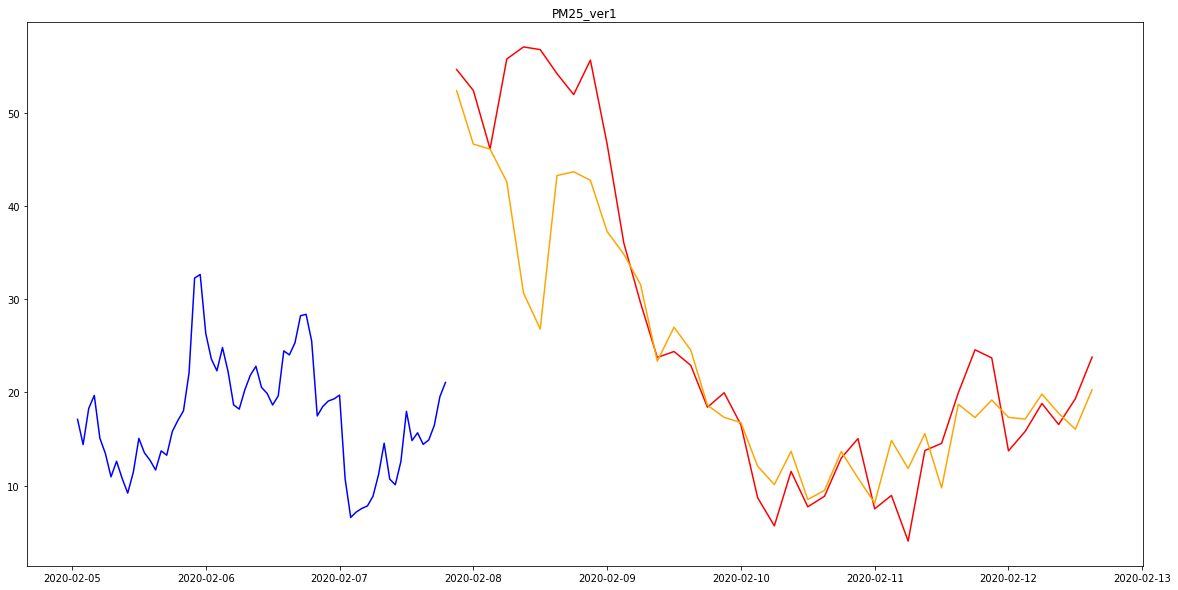

In [27]:
plt.figure(figsize=(20,10))
plt.plot(do_wykresu['czas'], do_wykresu['pred_xgb'], color='red') #prognoza
plt.plot(do_wykresu['czas'], do_wykresu['pred_lgb'], color='orange') #prognoza
plt.plot(pm['data'], pm['value'], color='blue') #historia


plt.title('PM25_ver1')
plt.show()

# ze zmienną opóźnioną

In [28]:
df = pd.read_csv('pm25.csv',index_col = 0, header = 0)
#df = df.drop('pm25lag', axis = 1) #usunięcie zmiennej pm25 opóźnionej
#df.head()

In [29]:
feats = ['Rok', 'Miesiąc', 'Dzień', 'Godzina',
         'Zachmurzenie_ogólne_[oktanty]',
         'Kierunek_wiatru_[°]',
         'Prędkość_wiatru_[m/s]',
         'Temperatura_powietrza_[°C]',
         'Wilgotność_względna_[%]',
         'Ciśnienie_na_pozimie_stacji_[hPa]',
         'Ciśnienie_na_pozimie_morza_[hPa]',
         'dzien_tygodnia','pm25lag']

In [30]:
y = df['Niepodległości']
X = df[feats].values

In [31]:
#podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [32]:
#XGBoost Regression 

score = scoring_cv(model_xgb)
print("Xgboost rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Xgboost rmse: 4.3192 (0.2637), r2: 93.8%



In [33]:
#LightGBM 

score = scoring_cv(model_lgb)
print("LGBM rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

LGBM rmse: 4.5710 (0.3163), r2: 93.0%



In [34]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [35]:
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [36]:
future_feats = ['rok','mies','dzien','godz','zach','kier','prwtr','temp','wilg','cisg','cism','dztyg']

In [37]:
# rzeczy potrzebne do liczenia prognozy
i=0
while (gios['values'][i]['value'] is None) and i < 20 :
    i +=1

last_gios = gios['values'][i]['value']

estimatesX = []
estimatesL = []

In [38]:
for k in range(future.shape[0]):
    if k==0:
        prediction = model_xgb.predict([np.append(future[future_feats].iloc[k,:].values, last_gios)])
    else:
        prediction = model_xgb.predict([np.append(future[future_feats].iloc[k,:].values, estimatesX[k-1])])
    estimatesX = np.append(estimatesX, prediction)

print(estimatesX)

[27.10516548 32.29564667 31.34491158 30.08742905 28.11442947 25.56302071
 25.46568489 28.36381531 31.82254028 32.24478149 29.63199234 26.91198349
 25.61474037 23.70206261 23.00402641 22.26338577 22.37737656 20.38401604
 17.7295208  15.95113945 12.2407589  10.99089241 10.63427925 10.7021265
 10.65433025  9.66266918  8.63269997  7.87035465  8.29697037  9.48545933
  9.89183235 12.30012321 12.37927151 10.57956505  9.98940468 10.95912838
 12.86498928 13.32377434 15.14956284]


In [39]:
for k in range(future.shape[0]):
    if k==0:
        prediction = model_lgb.predict([np.append(future[future_feats].iloc[k,:].values, last_gios)])
    else:
        prediction = model_lgb.predict([np.append(future[future_feats].iloc[k,:].values, estimatesL[k-1])])
    estimatesL = np.append(estimatesL, prediction)

print(estimatesL)

[27.64879723 30.28344873 32.57546098 33.20319601 31.25852568 29.94937379
 31.93362637 34.74309888 37.61485778 36.68851895 34.46399558 32.45259472
 30.68118907 28.26233941 26.35503162 25.1485382  23.49591215 20.99675464
 17.14378172 14.12439992 13.14187635 11.51790052 10.72574762 10.10623176
 10.51869597  8.17553239  6.42771834  4.72110739  5.54810897  4.70575325
  6.29628302  7.1550706   8.89385089  7.46874132  6.16371375  6.52816282
  6.68700606  7.05846382  7.998378  ]


In [40]:
future['pred_xgb_lag'] = estimatesX
future['pred_lgb_lag'] = estimatesL

In [41]:
do_wykresu = future[['czas','pred_xgb_lag','pred_lgb_lag']]

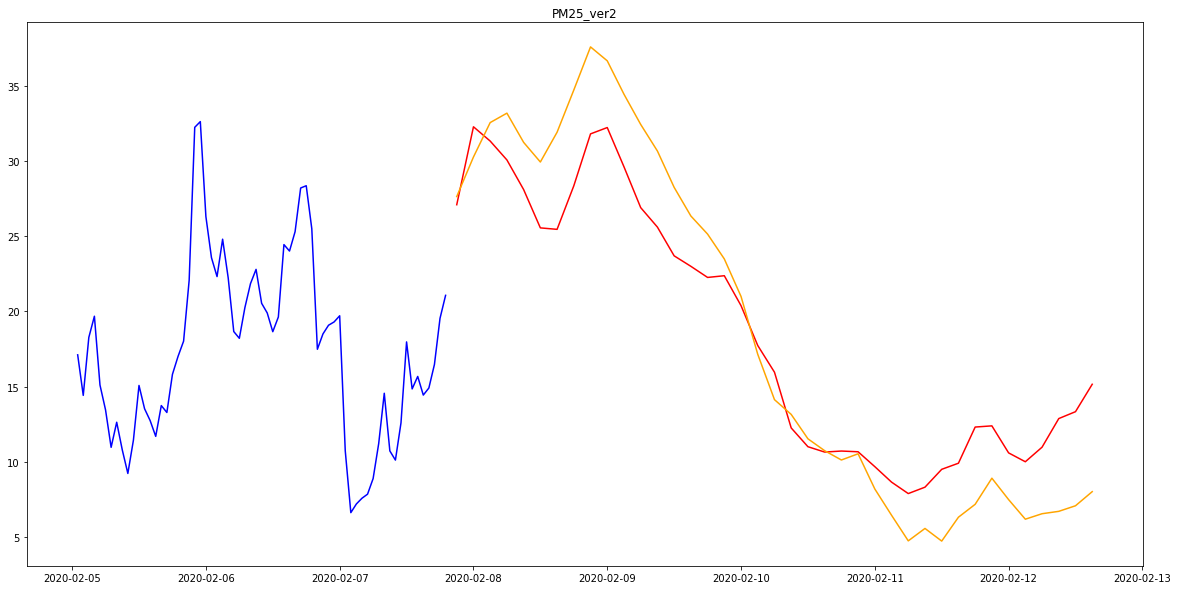

In [42]:
plt.figure(figsize=(20,10))
plt.plot(do_wykresu['czas'], do_wykresu['pred_xgb_lag'].astype('float32'), color='red') #prognoza
plt.plot(do_wykresu['czas'], do_wykresu['pred_lgb_lag'].astype('float32'), color='orange') #prognoza
plt.plot(pm['data'], pm['value'], color='blue') #historia


plt.title('PM25_ver2')
plt.show() 